# folium 이란

##### folium은 파이썬의 라이브러리로 지도 데이터를 시각화하는데 아주 쉽게 도와줍니다.  
##### leflet.js를 기반으로 만들어 졌습니다.  
##### 지도에 마커를 표현하거나 범위를 나타내는 다양한 도형을 입력할 수 있습니다.  

In [17]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# 플레이데이터 독산 위도, 경도
latitude, longitude = (37.468251, 126.886212)

In [6]:
m = folium.Map(location=[latitude,longitude],
               zoom_start=17,
               width=750,
               height=500)
folium.Marker([latitude,longitude],
              popup='플레이데이터',
              tooltip='플레이데이터').add_to(m)
m

In [7]:
survey_raw_df = pd.read_csv('/Users/kimhoyoung/python/data/survey_results_public.csv' , index_col = 'ResponseId')

In [10]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [11]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country' : country_counts.index,
                                  'Count' : country_counts.values})
country_counts_df

Country  Count
0                             United States of America  13543
1                                                India   6639
2                                              Germany   5395
3    United Kingdom of Great Britain and Northern I...   4190
4                                               Canada   2490
..                                                 ...    ...
175                                             Monaco      1
176                                           Djibouti      1
177                                         Seychelles      1
178                                    Solomon Islands      1
179                              Saint Kitts and Nevis      1

[180 rows x 2 columns]

In [12]:
country_counts_df.at[12,'Country']

'Russian Federation'

In [13]:
country_counts_df.at[12,'Country'] = 'Russia'

In [14]:
m = folium.Map(location=[30,0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data = country_counts_df,
    columns = ['Country','Count'],
    key_on='feature.properties.name',
    threshold_scale = [1,30,100,300,1_000,3_000,10_000,14_000],
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Respondents',
).add_to(m)

folium.LayerControl().add_to(m)
m

In [16]:
m.save('Country.html')

In [18]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

#https://python-visualization.github.io/folium/quickstart.html

In [1]:
from wordcloud import WordCloud

In [9]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]


In [10]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

Country  \
ResponseId                                                      
1                                                         NaN   
2                                                      Canada   
3           United Kingdom of Great Britain and Northern I...   
4                                                      Israel   
5                                    United States of America   
...                                                       ...   
73264                                                 Nigeria   
73265                                United States of America   
73266                                United States of America   
73267       United Kingdom of Great Britain and Northern I...   
73268                                                  Canada   

                        Age Gender  \
ResponseId                           
1                       NaN    NaN   
2                       NaN    NaN   
3           25-34 years old    Man   
4           35-44 years old    Man   
5           25-34 years old    NaN   
...                     ...    ...   
73264       25-34 years old    Man   
73265       25-34 years old    Man   
73266       55-64 years old    Man   
73267       55-64 years old    Man   
73268       25-34 years old    Man   

                                                    EdLevel YearsCode  \
ResponseId                                                              
1                                                       NaN       NaN   
2                                                       NaN       NaN   
3           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        14   
4              Bachelor’s degree (B.A., B.S., B.Eng., etc.)        20   
5              Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
...                                                     ...       ...   
73264          Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
73265       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         6   
73266          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        42   
73267          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        50   
73268          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        16   

           YearsCodePro                             LanguageHaveWorkedWith  \
ResponseId                                                                   
1                   NaN                                                NaN   
2                   NaN                              JavaScript;TypeScript   
3                     5                  C#;C++;HTML/CSS;JavaScript;Python   
4                    17                       C#;JavaScript;SQL;TypeScript   
5                     3        C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript   
...                 ...                                                ...   
73264                 5  Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...   
73265                 5          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   
73266                33                 HTML/CSS;JavaScript;PHP;Python;SQL   
73267                31                                      C#;Delphi;VBA   
73268                 5        C#;JavaScript;Lua;PowerShell;SQL;TypeScript   

                                    LanguageWantToWorkWith  \
ResponseId                                                   
1                                                      NaN   
2                                          Rust;TypeScript   
3                    C#;C++;HTML/CSS;JavaScript;TypeScript   
4                                        C#;SQL;TypeScript   
5               C#;Elixir;F#;Go;JavaScript;Rust;TypeScript   
...                                                    ...   
73264       Bash/Shell;Go;JavaScript;Python;SQL;TypeScript   
73265                           HTML/CSS;JavaScript;Python   
73266                C#;HTML/CSS;JavaScript;PHP;Python;SQL   
73267                                               Delphi   
7326

In [11]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [12]:
temp_words = survey_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [13]:
temp_words = temp_words.str.replace(';',' ').str.replace(',',' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [14]:
words = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

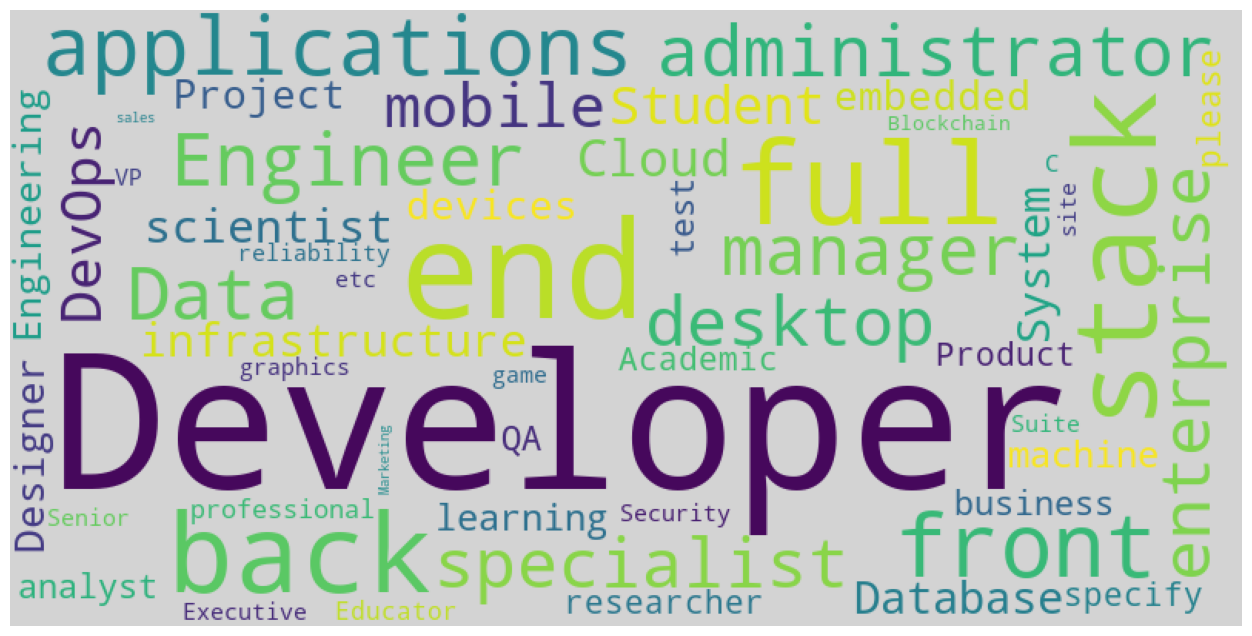

In [20]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# font_path=['폰트 경로']
# max_font_size = 60 ----> 최대 글자 크기를 지정한다.

wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400,
               background_color='lightgrey').generate(words)
plt.figure(figsize=(16,8))

# x,y축을 그리지 않습니다.
plt.axis('off')

# grid lines를 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()

In [22]:
wc.to_file('DevType.png')